# Import Library

In [23]:
#===== Pandas =====
import pandas as pd
pd.set_option("display.max_columns",None)

#====== Numpy =====
import numpy as np

#====== Matplotlib =====
import matplotlib.pyplot as plt
import matplotlib.pyplot as gridspec
import seaborn as sns

#===== Fitler warnings =====
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [2]:
df = pd.read_csv("coffee/total-production.csv")

# Eksplonatory Data Analytics

In [3]:
df.head()

,total_production,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,54.9390,49.785,20.6900,56.640,38.0130,14.7700,24.9650,35.0950,35.6310,37.6100,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,157.7020,147.604,94.0160,126.668,103.3230,154.8071,109.9692,146.4297,116.0292,120.4186,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,47577.8065,31310.353,31365.0955,48351.634,28873.4093,39281.1457,32932.9797,48431.7338,38911.4571,51490.5177,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,350.5500,487.460,143.9820,453.732,337.8580,437.0360,103.3150,498.5000,132.8560,411.7822,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,1197.6832,853.817,792.8470,582.224,640.7900,780.4350,935.3007,1034.5199,950.4028,770.6473,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [4]:
df_melt = pd.melt(df,
                id_vars=["total_production"],
                value_vars=df.columns[1::].tolist(),
               var_name="year",
               value_name="production")
df_melt = df_melt.rename(columns={"total_production":"country"})

df_melt.head()

,country,year,production
0,Angola,1990,50.3450
1,Bolivia (Plurinational State of),1990,122.7770
2,Brazil,1990,27285.6286
3,Burundi,1990,487.3930
4,Ecuador,1990,1503.8150


In [5]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1624 non-null   object 
 1   year        1624 non-null   object 
 2   production  1624 non-null   float64
dtypes: float64(1), object(2)
memory usage: 38.2+ KB


## Top 10 Production

In [6]:
top10_production = df_melt.groupby("country")["production"].sum()\
                                                            .sort_values(ascending=False).head(10)
top10_production

country
Brazil       1.190966e+06
Viet Nam     4.395410e+05
Colombia     3.458714e+05
Indonesia    2.451168e+05
Ethiopia     1.415429e+05
India        1.320257e+05
Mexico       1.269082e+05
Guatemala    1.134011e+05
Honduras     1.054566e+05
Uganda       9.314637e+04
Name: production, dtype: float64

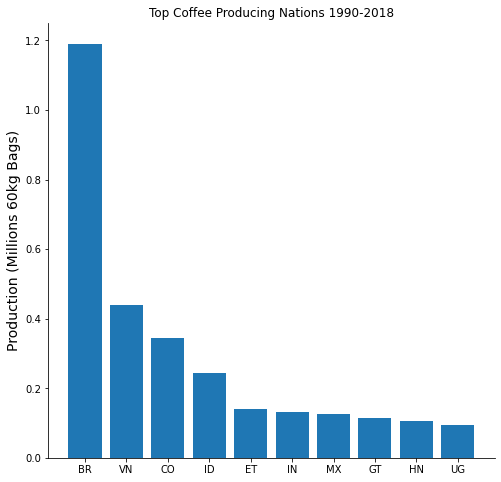

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

ax.bar(x=top10_production.index,height=top10_production/10e5)

positions = list(range(0,10))

labels = ["BR","VN","CO","ID","ET","IN","MX","GT","HN","UG"]

ax.set_title("Top Coffee Producing Nations 1990-2018")
ax.set_ylabel("Production (Millions 60kg Bags)", fontsize=14)

ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()

The figure above is the top 10 countries in total production of coffee, we can see that Brazil is the country with the highest total production of coffee the others

## Top 5 over time

In [8]:
top5 = df_melt[df_melt["country"].isin(top10_production.index[0:5])]\
                                                    .set_index("year")
top5.index = top5.index.astype("datetime64[ns]")
top5.head()

,country,production
year,,
1990-01-01,Brazil,27285.6286
1990-01-01,Indonesia,7441.3830
1990-01-01,Colombia,14396.0000
1990-01-01,Ethiopia,2909.4510
1990-01-01,Viet Nam,1310.2880


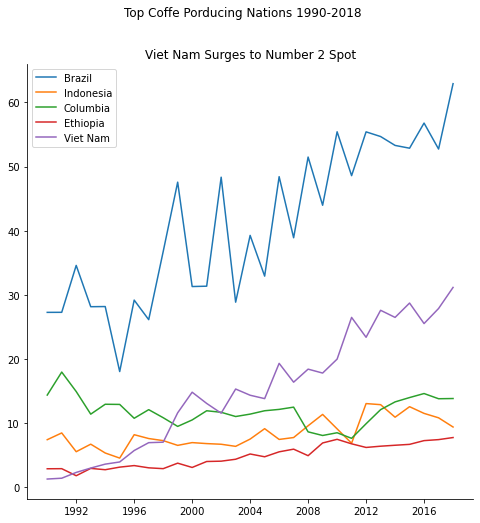

In [9]:
fig,ax = plt.subplots(figsize=(8,8))

brazil = top5[top5["country"]=="Brazil"]
indonesia = top5[top5["country"]=="Indonesia"]
colombia = top5[top5["country"]=="Colombia"]
ethiopia = top5[top5["country"]=="Ethiopia"]
vietnam = top5[top5["country"]=="Viet Nam"]

ax.plot(brazil.index,brazil["production"]/1000,label="Brazil")
ax.plot(indonesia.index,indonesia["production"]/1000,label="Indonesia")
ax.plot(colombia.index,colombia["production"]/1000,label="Columbia")
ax.plot(ethiopia.index,ethiopia["production"]/1000,label="Ethiopia")
ax.plot(vietnam.index,vietnam["production"]/1000,label="Viet Nam")

fig.suptitle('Top Coffe Porducing Nations 1990-2018')
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend()
plt.show()

## Composition Over Time

How brazil's share of global coffee production has change over time ?

In [10]:
brazil_vs_others = pd.pivot_table(df_melt,
                                  index='year',
                                  columns='country',
                                  values='production',
                                  aggfunc='sum')
brazil_vs_others["rest_of_world"] = brazil_vs_others.drop("Brazil",axis=1)\
                                                    .sum(axis=1)
brazil_vs_others = brazil_vs_others.loc[:,["Brazil","rest_of_world"]]\
                                    .astype({"Brazil":"float64"})
brazil_vs_others

country,Brazil,rest_of_world
year,,
1990,27285.6286,65944.4310
1991,27293.4934,73973.1910
1992,34603.3542,63922.5450
1993,28166.9786,63597.6430
1994,28192.0470,65121.1470
1995,18060.2022,69257.2560
1996,29196.7430,74105.8530
1997,26148.0040,73713.1950
1998,36760.8533,72131.3598


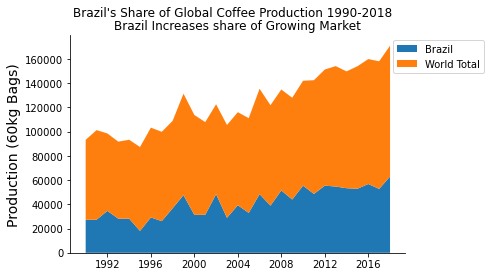

In [11]:
fig,ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"),
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    labels=["Brazil","World Total"]
)

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_title("Brazil Increases share of Growing Market")
ax.set_ylabel('Production (60kg Bags)',fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(bbox_to_anchor=(1.25,1))
plt.show()

Global production has surged in the last 30 years, and the additional piece is that even though global production has surged, Brazil's share within the global also increasing, so Brazil is increasing its rate of growing faster.

## Price Relationships

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

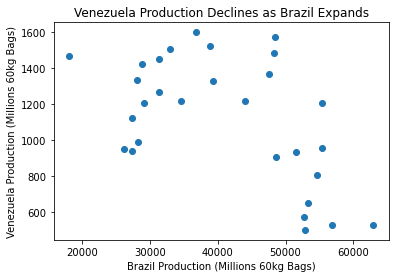

In [12]:
df_pivot = pd.pivot_table(df_melt,
               index='year',
               columns='country',
               values='production',
               aggfunc='sum')


fig,ax = plt.subplots()

ax.scatter(
    df_pivot["Brazil"],
    df_pivot["Venezuela"]
)

ax.set_title('Venezuela Production Declines as Brazil Expands')
ax.set_ylabel("Venezuela Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

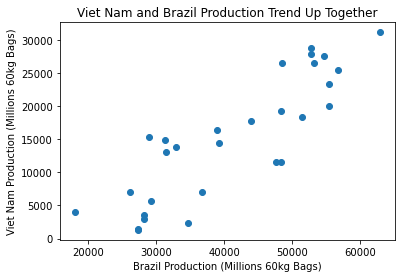

In [13]:
fig,ax = plt.subplots()

ax.scatter(
    df_pivot["Brazil"],
    df_pivot["Viet Nam"]
)

ax.set_title('Viet Nam and Brazil Production Trend Up Together')
ax.set_ylabel("Viet Nam Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

## Composition of Coffee Production

In [14]:
df_pivot["rest_of_world"] = df_pivot.drop(top5["country"].unique(),
                                          axis=1).sum(axis=1)

filter_col = top5["country"].unique().tolist() + ['rest_of_world']
df_pivot_top5_2018 = df_pivot.loc['2018',filter_col]

df_pivot_top5_2018

country
Brazil           62924.8836
Indonesia         9417.5942
Colombia         13857.9620
Ethiopia          7776.2234
Viet Nam         31174.0742
rest_of_world    45786.0003
Name: 2018, dtype: float64

Text(0.5, 0.98, 'Share of Global Coffee Production 2018')

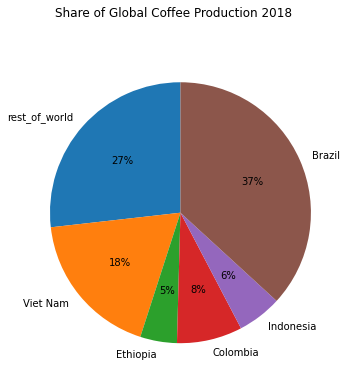

In [15]:
fig,ax = plt.subplots(figsize=(8,6))

ax.pie(df_pivot_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(df_pivot_top5_2018.index[::-1]),
       startangle=90
      )

fig.suptitle("Share of Global Coffee Production 2018")

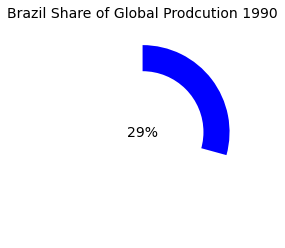

In [16]:
fig,ax=plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels=["",""],
    pctdistance=.85,
    colors=["white","Blue"]
)

hole = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['1990','Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=14
)

ax.set_title("Brazil Share of Global Prodcution 1990", fontsize=14)
plt.show()

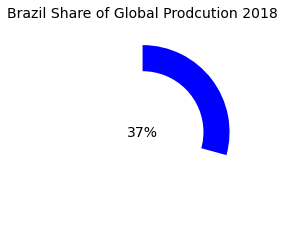

In [17]:
fig,ax=plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels=["",""],
    pctdistance=.85,
    colors=["white","Blue"]
)

hole = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['2018','Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=14
)

ax.set_title("Brazil Share of Global Prodcution 2018", fontsize=14)
plt.show()

In 1990 Brazil contributed 29% of the total global coffee production, and in 2018 Brazil contributed 37% of the total global coffee production.

# Report On Brazil's Place in Global Coffee Market

In [20]:
axes_setting = {
    "spines.top":False,
    "spines.right":False,
}

plt.rc("axes",**axes_setting)

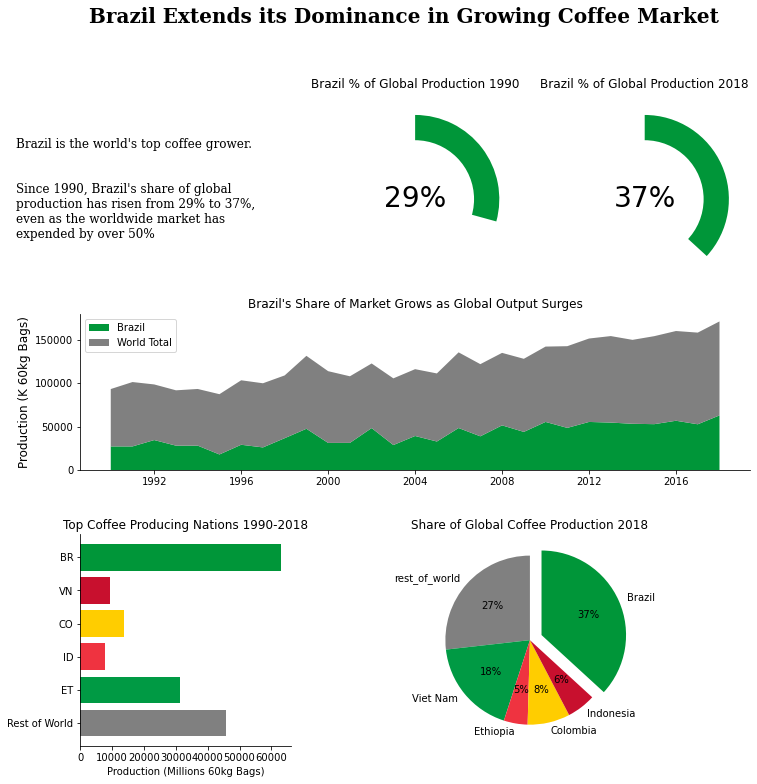

In [99]:
fig = plt.figure(figsize=(12,12),facecolor='#FFFFFF')

gs = gridspec.GridSpec(nrows=12,ncols=6)

fig.suptitle("Brazil Extends its Dominance in Growing Coffee Market",
             fontsize=20,
             fontweight="bold",
             fontfamily="serif")

fig.text(.05,.695,
'''Brazil is the world's top coffee grower.
         
         
Since 1990, Brazil's share of global
production has risen from 29% to 37%,
even as the worldwide market has
expended by over 50%
         ''',
         fontsize=12,fontweight='light',fontfamily='serif')


ax1 = fig.add_subplot(gs[0:4,2:4])

ax1.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels=["",""],
    pctdistance=.85,
    colors=["White","#009639"]
)

center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['1990','Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=28
)
ax1.set_title("Brazil % of Global Production 1990",fontsize=12)



ax2 = fig.add_subplot(gs[0:4,4:])

ax2.pie(
    brazil_vs_others.iloc[-1].sort_values(ascending=False),
    startangle=90,
    labels=["",""],
    pctdistance=.85,
    colors=["White","#009639"]
)

center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['2018','Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%",
    ha='center',
    va='center',
    fontsize=28
)
    
ax2.set_title("Brazil % of Global Production 2018",fontsize=12)


ax3 = fig.add_subplot(gs[4:7,:])
ax3.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"),
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    labels=["Brazil","World Total"],
    colors=["#009639","grey"]
)

ax3.set_title("Brazil's Share of Market Grows as Global Output Surges")
ax3.set_ylabel("Production (K 60kg Bags)", fontsize=12)
ax3.legend(loc="upper left")

ax4 = fig.add_subplot(gs[8:,0:2])
ax4.barh(y=df_pivot_top5_2018.index[::-1],
        width=df_pivot_top5_2018.iloc[::-1],
        color=["grey","#009A44","#EF3340","#FFCD00","#C8102E","#009639"])

position = list(range(6))
labels=["BR","VN","CO","ID","ET","Rest of World"][::-1]

ax4.set_title("Top Coffee Producing Nations 1990-2018")
ax4.set_xlabel("Production (Millions 60kg Bags)", fontsize=10)
ax4.set_yticks(position)
ax4.set_yticklabels(labels)

ax5 = fig.add_subplot(gs[8:,2:])
ax5.pie(
    df_pivot_top5_2018[::-1],
    autopct="%.0f%%",
    labels=list(df_pivot_top5_2018.index[::-1]),
    startangle=90,
    colors=["grey","#009A44","#EF3340","#FFCD00","#C8102E","#009639","#C8102E",],
    explode=(0,0,0,0,0,.15)
)

ax5.set_title("Share of Global Coffee Production 2018")
plt.show()

In [90]:
fig.savefig('brazil_stats.png',bbox_inches='tight',facecolor='white')